In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

## Gives a uniform distribution

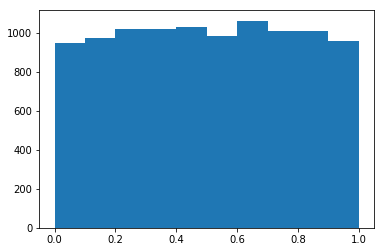

In [3]:
x = np.random.rand(10000)

plt.hist(x)
plt.show()

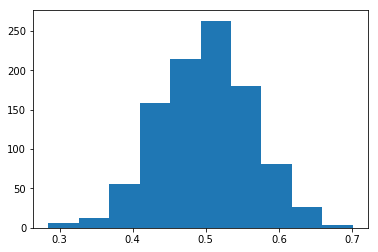

In [5]:
y = np.random.rand(10000)
samples = []
for x in range(1000):
    samples.append(np.mean(random.choices(y, k=20)))
    
plt.hist(samples)
plt.show()


In [5]:
## Gives a random distribution

y = np.random.randn(10000)

plt.hist(y)
plt.show()